In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from numpy.linalg import norm
import seaborn as sns
from math import e
import random

In [3]:
def Normalize(x):
    x = (x - x.min() ) / (x.max() - x.min())
    return x

In [4]:
def softmax(z):
    z -= np.max(z)
    soft_max = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return soft_max

In [5]:
def addbias(X):
    #matrix = X.reshape(X.shape[0], 1)
    ones = np.ones((X.shape[0],1))
    concat=np.concatenate((ones,X), axis=1)
    return concat

In [6]:
def relabel(y_train):
    y_train1=[1 if y==1 else 0 for y in y_train ]
    y_train2=[1 if y==2 else 0 for y in y_train ]
    y_train3=[1 if y==3 else 0 for y in y_train ]
    y_train1 =np.array(y_train1).reshape(y_train.shape[0],1)
    y_train2 =np.array(y_train2).reshape(y_train.shape[0],1)
    y_train3 =np.array(y_train3).reshape(y_train.shape[0],1)
    y=np.concatenate((y_train1, y_train2,y_train3), axis = 1)
    return y

In [7]:
def cost(y_hat,y):
    d = -1/y.size * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1-y_hat),axis=0)
    return d

In [8]:
def predict(X,theta):
    z = np.dot(X,theta.T)
    a=softmax(z)
    return  np.argmax(a, axis=1)

In [9]:
def relabel_data(y):
    label = list(set(y))
    relabeled_data = np.zeros(len(y)*len(label)).reshape(len(y),len(label))
    for i in range(len(label)):
        relabeled_data[y==label[i],i] = 1
    return relabeled_data

In [10]:
def LogisticRegression(x, y,alpha,itr): 
    m, n = x.shape
    #theta=np.random.random((3,n))
    theta=np.zeros((3,n))
    #theta0=np.random.random(3)
    errors= []
    for i in range(itr):
        xw = np.dot(x,theta.T)
        y_hat = softmax(xw)
        error= cost(y_hat, y)
        errors.append(error)
        grd=np.dot(x.T, (y_hat - y)) /y.size
        theta=theta - alpha * grd.T
       
        #theta= theta - alpha*((1/y.size * np.dot(x.T, (y_hat - y)))).T    
    return theta,errors

In [11]:
df=pd.read_excel("seed.xlsx")
#df["class"].replace({1: 0., 2: 1., 3: 2.}, inplace=True)
x_train,x_test,y_train,y_test= ms.train_test_split(df[["x1","x2",'x3','x4','x5','x6','x7']],df['class'], train_size=0.8)

In [12]:
x_train=(np.asanyarray(x_train))
x_test=(np.asanyarray(x_test))
x_train, x_test = addbias(x_train),addbias(x_test)
#y_train=np.asanyarray(y_train)
y_test=relabel(y_test)
y_train = relabel(y_train)

In [13]:
theta,errors = LogisticRegression(x_train,y_train, 0.07,200000)

In [14]:
y_hat=predict(x_train,theta)
y_train1 = np.argmax(y_train, axis=1)
train_ac=np.sum(y_train1==y_hat)/len(y_train1)
train_ac

0.9821428571428571

In [15]:
y_hat=predict(x_test,theta)
y_test1 = np.argmax(y_test, axis=1)
test_ac=np.sum(y_test1==y_hat)/len(y_test1)
test_ac

0.9285714285714286

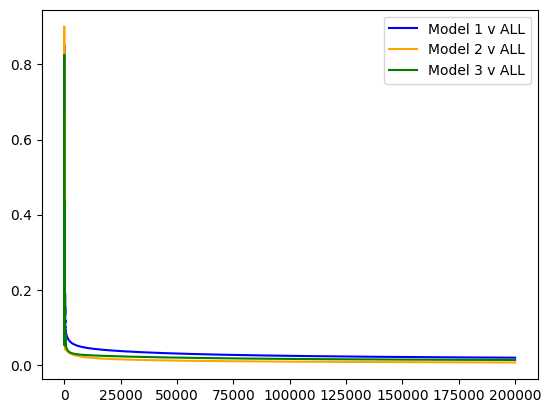

In [16]:

errors = np.array(errors)
plt.plot(list(range(len(errors))), errors[:,0], color='Blue', label='Model 1 v ALL')
plt.plot(list(range(len(errors))), errors[:,1], color='Orange', label='Model 2 v ALL')
plt.plot(list(range(len(errors))), errors[:,2], color='Green', label='Model 3 v ALL')
plt.legend(loc='best')
plt.show()